In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load the CSV data
file_path = '/Users/matheus/Documents/Projetos/Pessoal/MBA_USP/02 - Ciências de Dados, Aprendizado de Máquina e Mineração de Dados/Aula 5 - Escalonamento Numerico Numerico/california_housing_train.csv'
data = pd.read_csv(file_path).sample(100)

# Extract the relevant columns
rooms = data['total_rooms']
age = data['housing_median_age']

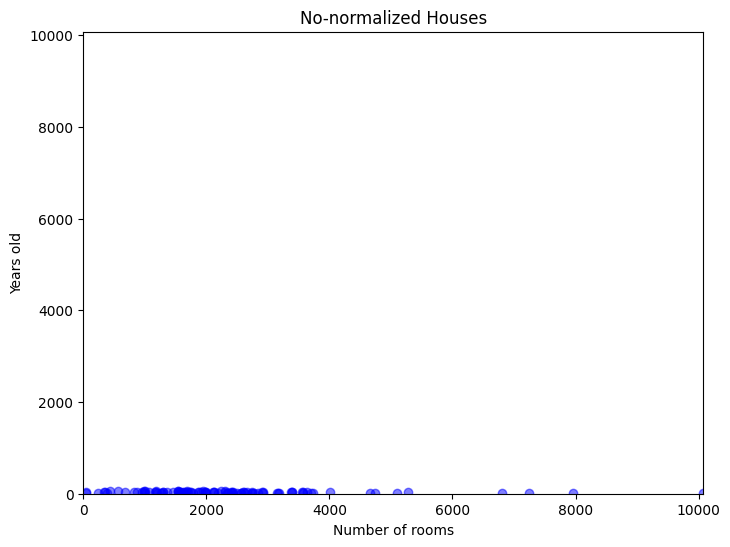

In [3]:
max_limit = max(age.max(), rooms.max())

# Extract the relevant columns
rooms = data['total_rooms']
age = data['housing_median_age']

# Plot without normalization
plt.figure(figsize=(8, 6))  # Adjust the figure size for better appearance
plt.scatter(rooms, age, color='blue', alpha=0.5)
plt.ylabel('Years old')
plt.xlabel('Number of rooms')
plt.title('No-normalized Houses')
plt.ylim(0, max_limit)
plt.xlim(0, max_limit)
plt.show()

In [4]:
# Min-Max Scaling

min_max_scaler = MinMaxScaler()
#

data_min_max_scaled = min_max_scaler.fit_transform(data[['total_rooms', 'housing_median_age']])

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 13407 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rooms   100 non-null    float64
 1   Age     100 non-null    float64
dtypes: float64(2)
memory usage: 2.3 KB


array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Age'}>]], dtype=object)

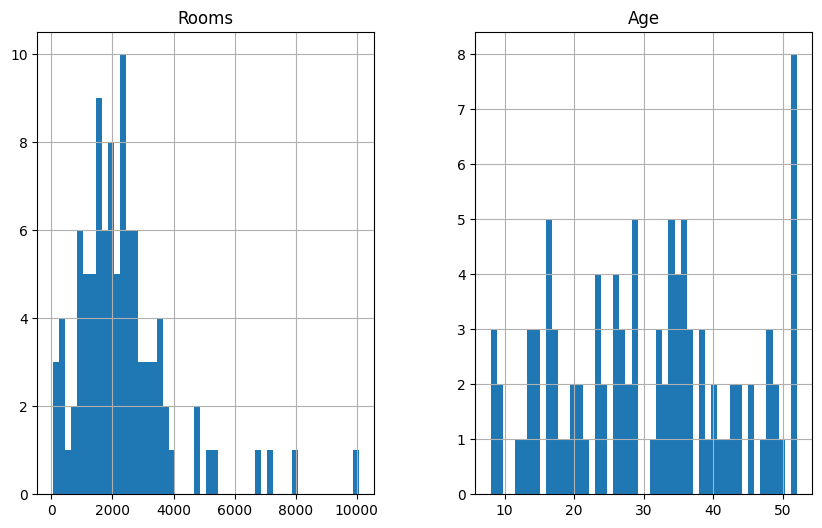

In [5]:
dados = pd.DataFrame.from_dict(
                    {'Rooms': rooms,
                     'Age': age
                    }
                     )
dados.info()
#dados.plot(kind='hist')
dados.hist(bins=50,figsize=[10,6])

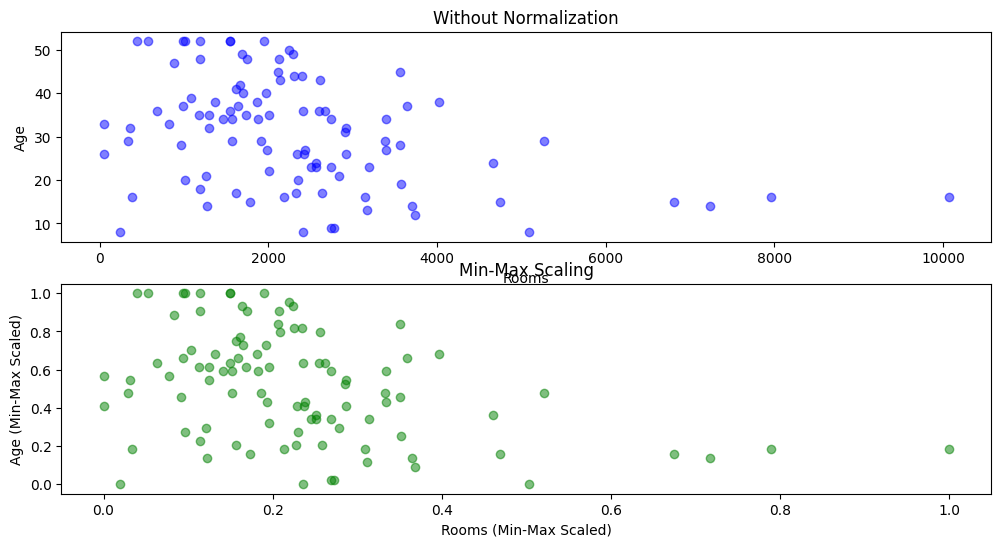

In [6]:
# Plot without normalization
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.scatter(rooms, age, color='blue', alpha=0.5)
plt.xlabel('Rooms')
plt.ylabel('Age')
plt.title('Without Normalization')

plt.subplot(2, 1, 2)
plt.scatter(data_min_max_scaled[:, 0], data_min_max_scaled[:, 1], color='green', alpha=0.5)
plt.xlabel('Rooms (Min-Max Scaled)')
plt.ylabel('Age (Min-Max Scaled)')
plt.title('Min-Max Scaling')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rooms_n  100 non-null    float64
 1   Age_n    100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


array([[<Axes: title={'center': 'Rooms_n'}>,
        <Axes: title={'center': 'Age_n'}>]], dtype=object)

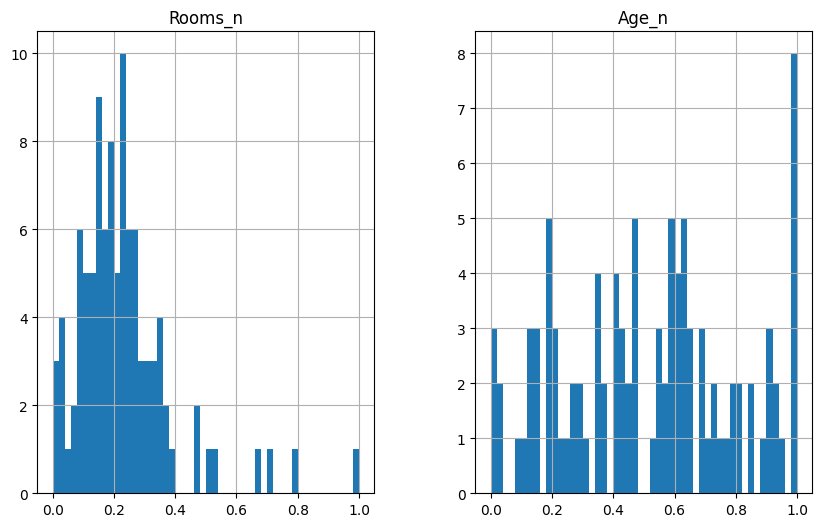

In [7]:
dados = pd.DataFrame.from_dict(
                    {'Rooms_n': data_min_max_scaled[:, 0],
                     'Age_n':  data_min_max_scaled[:, 1]
                    }
                     )
dados.info()
#dados.plot(kind='hist')
dados.hist(bins=50,figsize=[10,6])

In [8]:
# Z-score Normalization
z_scaler = StandardScaler()

data_z_scaled = z_scaler.fit_transform(data[['total_rooms', 'housing_median_age']])

Text(0.5, 1.0, 'Z-score Normalization')

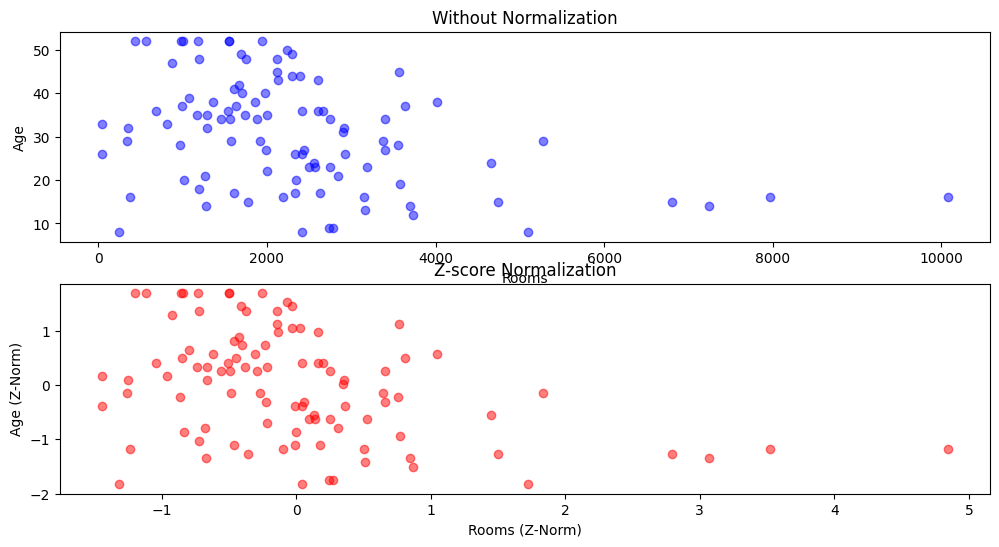

In [9]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.scatter(rooms, age, color='blue', alpha=0.5)
plt.xlabel('Rooms')
plt.ylabel('Age')
plt.title('Without Normalization')

plt.subplot(2, 1, 2)
plt.scatter(data_z_scaled[:, 0], data_z_scaled[:, 1], color='red', alpha=0.5)
plt.xlabel('Rooms (Z-Norm)')
plt.ylabel('Age (Z-Norm)')
plt.title('Z-score Normalization')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rooms_n  100 non-null    float64
 1   Age_n    100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


array([[<Axes: title={'center': 'Rooms_n'}>,
        <Axes: title={'center': 'Age_n'}>]], dtype=object)

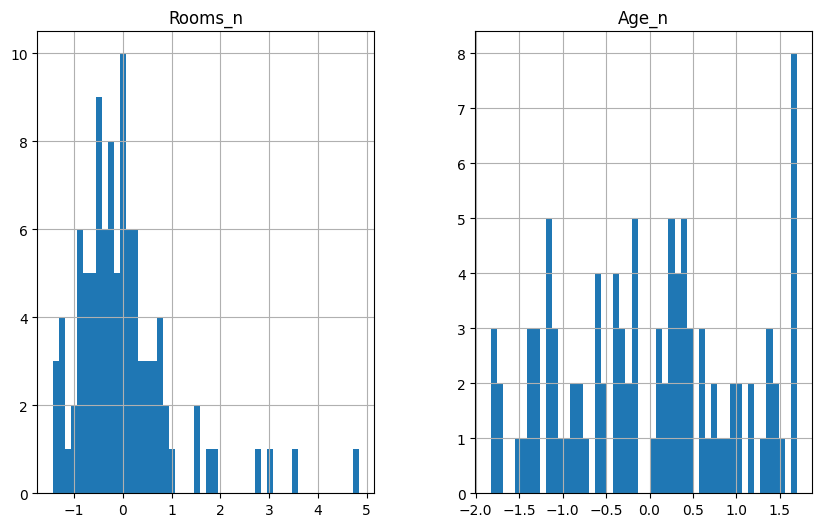

In [10]:
dados = pd.DataFrame.from_dict(
                    {'Rooms_n': data_z_scaled[:, 0],
                     'Age_n':  data_z_scaled[:, 1]
                    }
                     )
dados.info()
#dados.plot(kind='hist')
dados.hist(bins=50,figsize=[10,6])

In [11]:
print("A media do no. de comodos é:",data_z_scaled[:, 0].mean())
print("O desvio-padrão é:",data_z_scaled[:, 0].var() )
print("\n")
print("A media da idade das casas é:",data_z_scaled[:, 1].mean())
print("O desvio-padrão é:",data_z_scaled[:, 1].var() )

A media do no. de comodos é: -7.105427357601002e-17
O desvio-padrão é: 0.9999999999999997


A media da idade das casas é: 8.43769498715119e-17
O desvio-padrão é: 1.0000000000000002


In [12]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

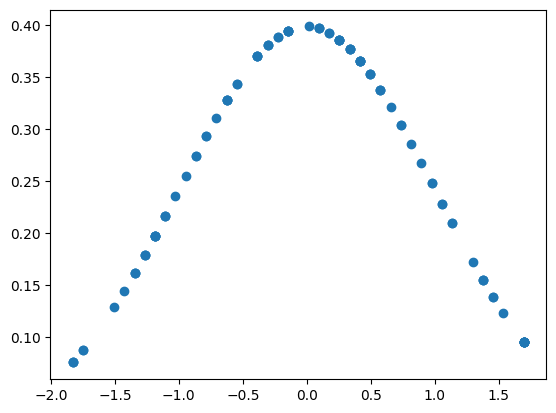

In [13]:
fit = stats.norm.pdf(data_z_scaled[:,1], np.mean(data_z_scaled[:,1]), np.std(data_z_scaled[:,1]))
plt.plot(data_z_scaled[:,1],fit,'o')